In [1]:
import pandas as pd

# Load the dataset
file_path = 'sentimentdataset.csv'  # Path to the uploaded dataset
data = pd.read_csv(file_path)

# Display the first few rows and basic information
print("Dataset Preview:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nMissing Values:")
print(data.isnull().sum())


Dataset Preview:
   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Ret

In [3]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

# Convert 'Timestamp' to datetime
data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'])

# Normalize sentiment labels (strip whitespace, lowercase)
data_cleaned['Sentiment'] = data_cleaned['Sentiment'].str.strip().str.lower()

# Preview the cleaned data
print("\nCleaned Dataset:")
print(data_cleaned.head())



Cleaned Dataset:
                                                Text Sentiment  \
0   Enjoying a beautiful day at the park!        ...  positive   
1   Traffic was terrible this morning.           ...  negative   
2   Just finished an amazing workout! 💪          ...  positive   
3   Excited about the upcoming weekend getaway!  ...  positive   
4   Trying out a new recipe for dinner tonight.  ...   neutral   

            Timestamp            User     Platform  \
0 2023-01-15 12:30:00   User123          Twitter     
1 2023-01-15 08:45:00   CommuterX        Twitter     
2 2023-01-15 15:45:00   FitnessFan      Instagram    
3 2023-01-15 18:20:00   AdventureX       Facebook    
4 2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workou

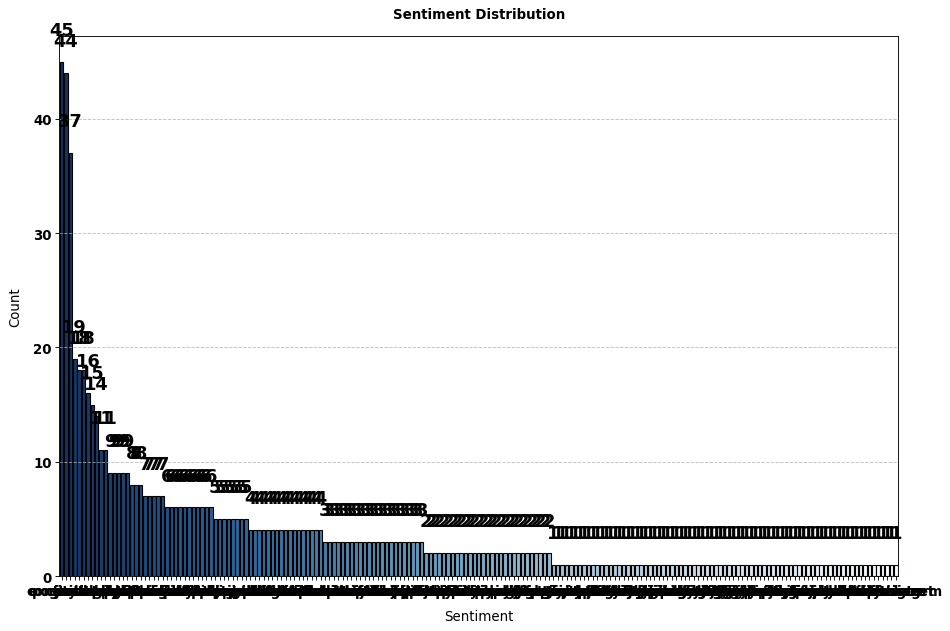

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the frequency of each sentiment
sentiment_counts = data_cleaned['Sentiment'].value_counts()

# Set the figure size and DPI for better resolution
plt.figure(figsize=(12, 8), dpi=80)

# Create a barplot with improved aesthetics
sns.barplot(
    x=sentiment_counts.index, 
    y=sentiment_counts.values, 
    palette='Blues_r', 
    edgecolor='black'
)

# Add titles and axis labels with clear font settings
plt.title('Sentiment Distribution', fontsize=12, fontweight='bold', pad=16)
plt.xlabel('Sentiment', fontsize=12, labelpad=10)
plt.ylabel('Count', fontsize=12, labelpad=10)

# Annotate bars with the exact count
for i, count in enumerate(sentiment_counts.values):
    plt.text(
        x=i, 
        y=count + 2, 
        s=str(count), 
        ha='center', 
        va='bottom', 
        fontsize=16, 
        color='black', 
        fontweight='bold'
    )

# Adjust ticks and layout
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()

# Show the plot
plt.show()


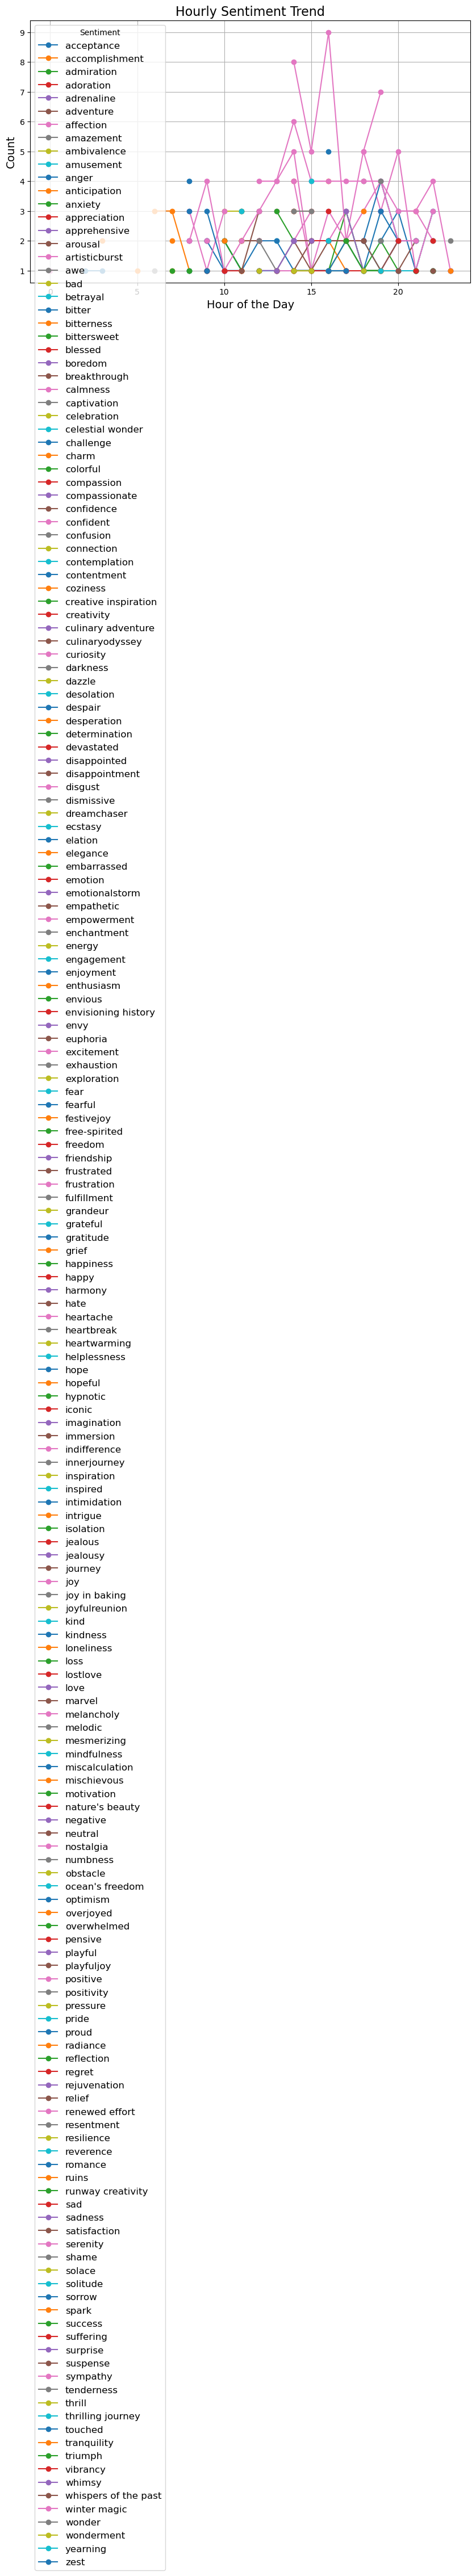

In [27]:
# Extract the hour from the timestamp
data_cleaned['Hour'] = data_cleaned['Timestamp'].dt.hour

# Group data by hour and sentiment
hourly_sentiment = data_cleaned.groupby(['Hour', 'Sentiment']).size().unstack()

# Plot the hourly sentiment trend
hourly_sentiment.plot(kind='line', figsize=(10, 6), marker='o')
plt.title('Hourly Sentiment Trend', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.grid(True)
plt.show()


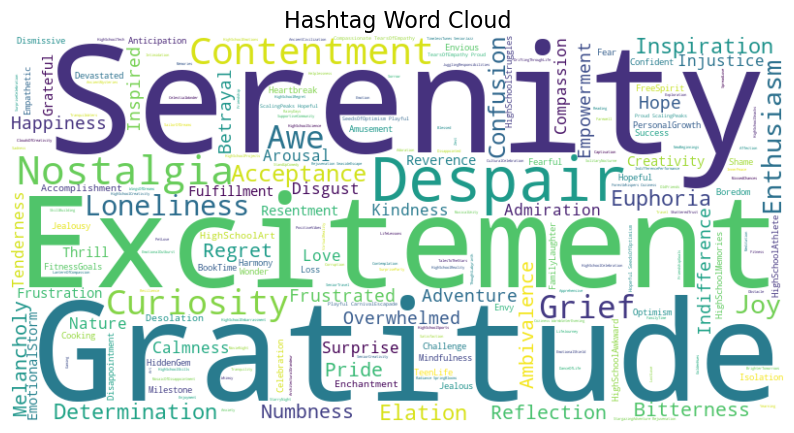

In [29]:
from wordcloud import WordCloud

# Combine all hashtags into a single string
hashtags = ' '.join(data_cleaned['Hashtags'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Hashtag Word Cloud', fontsize=16)
plt.show()


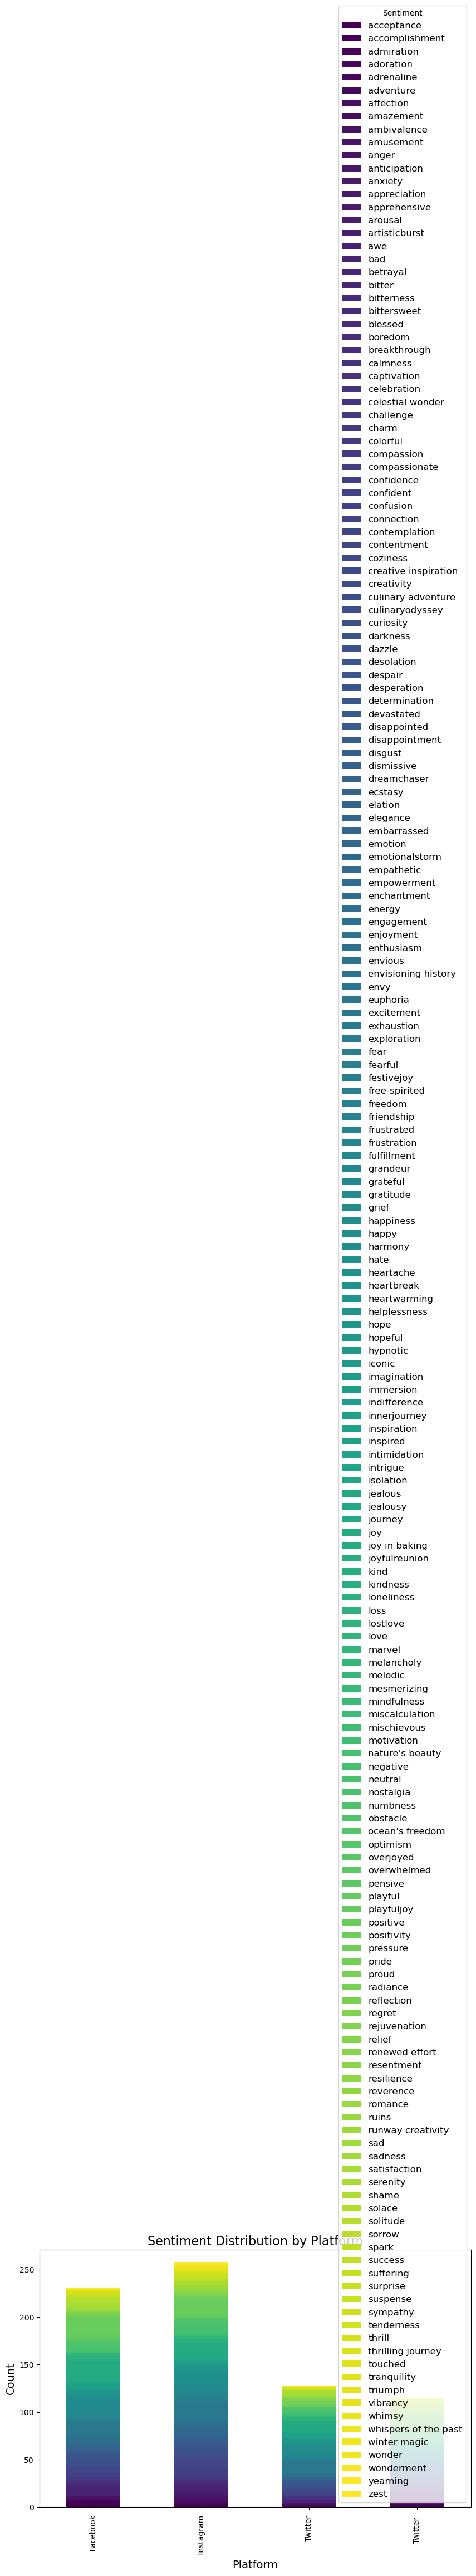

In [31]:
# Group data by platform and sentiment
platform_sentiment = data_cleaned.groupby(['Platform', 'Sentiment']).size().unstack()

# Plot sentiment distribution by platform
platform_sentiment.plot(kind='bar', figsize=(10, 6), stacked=True, colormap='viridis')
plt.title('Sentiment Distribution by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Sentiment', fontsize=12)
plt.show()


C:\Users\rashm\AppData\Local\Temp\ipykernel_2948\1230577756.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


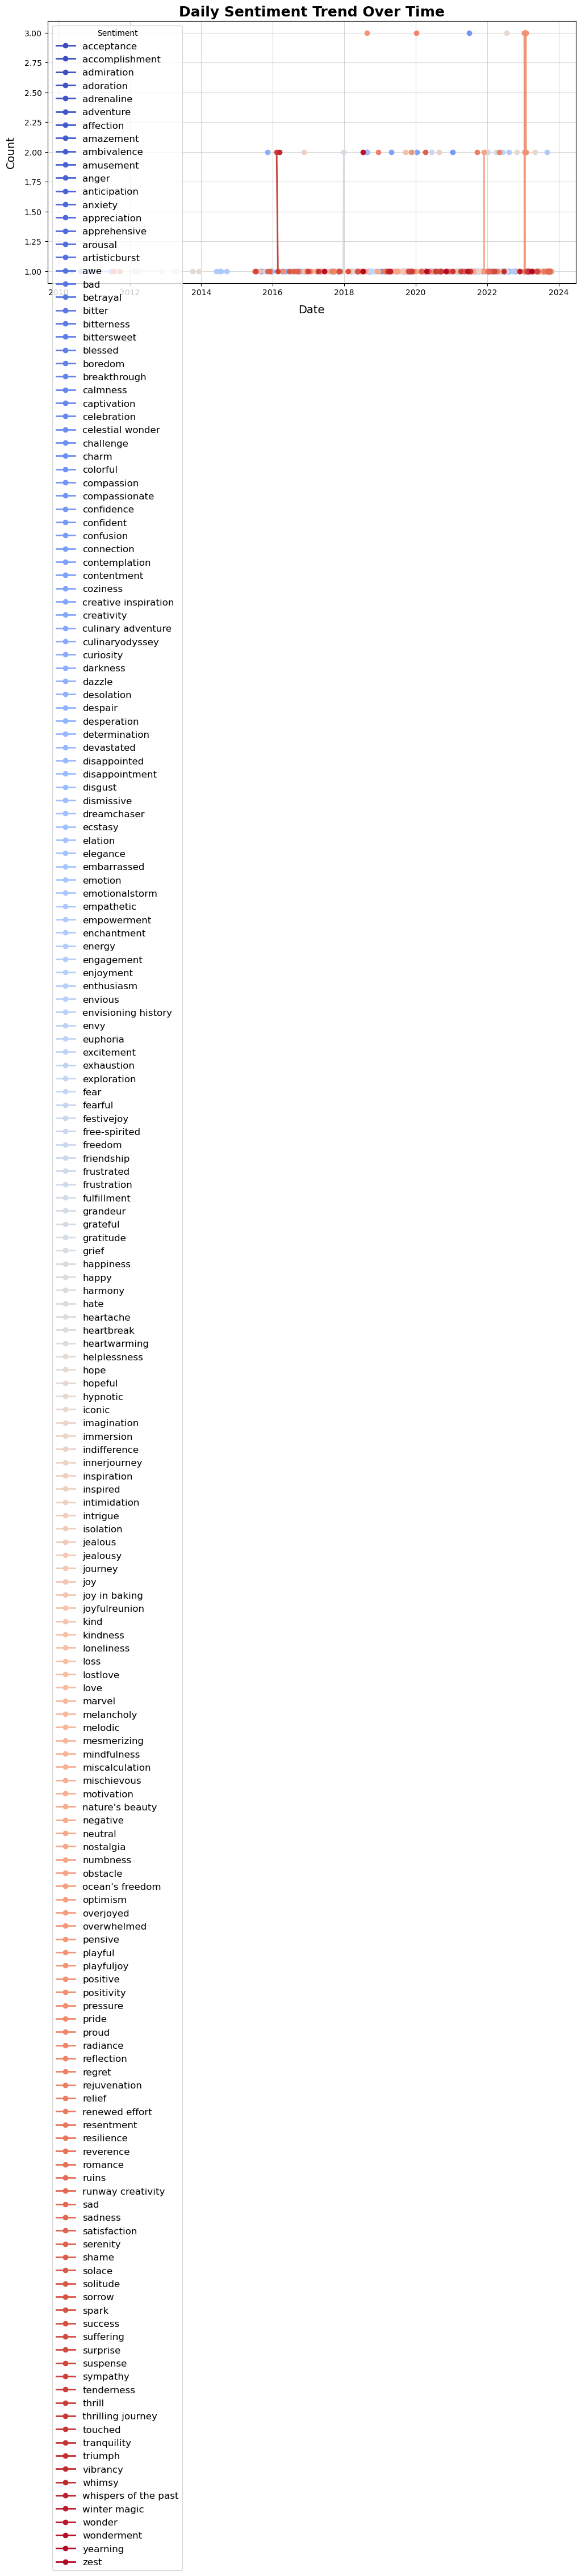

In [33]:
# Group data by date and sentiment
data_cleaned['Date'] = data_cleaned['Timestamp'].dt.date
daily_sentiment = data_cleaned.groupby(['Date', 'Sentiment']).size().unstack()

# Plot the daily sentiment trend
daily_sentiment.plot(kind='line', figsize=(12, 6), marker='o', linewidth=2, colormap='coolwarm')
plt.title('Daily Sentiment Trend Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14, labelpad=10)
plt.ylabel('Count', fontsize=14, labelpad=10)
plt.grid(True, alpha=0.5)
plt.legend(title='Sentiment', fontsize=12)
plt.tight_layout()
plt.show()


In [35]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel

# Text preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    return [word for word in tokens if word not in stop_words]

# Apply preprocessing
data_cleaned['Processed_Text'] = data_cleaned['Text'].apply(preprocess_text)

# Prepare for topic modeling
texts = data_cleaned['Processed_Text'].tolist()
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Build LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=42)

# Display topics
topics = lda_model.print_topics(num_words=5)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.006*"garden" + 0.005*"love" + 0.005*"soul" + 0.005*"tales" + 0.005*"whispers"
Topic 2: 0.007*"joy" + 0.006*"evening" + 0.006*"world" + 0.005*"feeling" + 0.004*"lost"
Topic 3: 0.007*"new" + 0.006*"dreams" + 0.006*"like" + 0.005*"sky" + 0.005*"inspiration"
Topic 4: 0.006*"challenges" + 0.005*"art" + 0.005*"dance" + 0.005*"journey" + 0.004*"personal"
Topic 5: 0.012*"new" + 0.006*"challenging" + 0.006*"day" + 0.005*"laughter" + 0.005*"emotions"


In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict and evaluate
y_pred = model.predict(X_test)

# Get the classification report with zero_division handling
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
                      precision    recall  f1-score   support

          acceptance       1.00      0.50      0.67         2
          admiration       0.00      0.00      0.00         2
           affection       0.00      0.00      0.00         1
         ambivalence       0.00      0.00      0.00         1
               anger       0.00      0.00      0.00         1
        anticipation       0.00      0.00      0.00         1
             arousal       0.00      0.00      0.00         3
                 awe       0.00      0.00      0.00         2
                 bad       0.00      0.00      0.00         1
            betrayal       0.00      0.00      0.00         3
              bitter       0.00      0.00      0.00         1
          bitterness       0.00      0.00      0.00         1
         bittersweet       0.00      0.00      0.00         1
             boredom       0.00      0.00      0.00         1
            calmness       0.00      0.00     

DeltaGenerator()

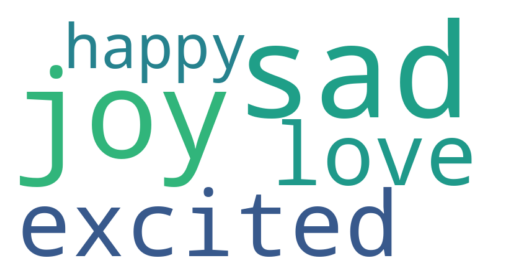

In [3]:
import streamlit as st
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mock Data Creation
data = {
    'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'Sentiment': np.random.choice(['Positive', 'Negative', 'Neutral'], 100),
    'Hashtags': np.random.choice(['#happy', '#sad', '#excited', '#joy', '#love'], 100)
}

# Create DataFrame
data_cleaned = pd.DataFrame(data)

# App Title
st.title("Sentiment Analysis Dashboard")

# Sentiment Distribution
st.subheader("Sentiment Distribution")
sentiment_counts = data_cleaned['Sentiment'].value_counts()
st.bar_chart(sentiment_counts)

# Temporal Trends
st.subheader("Sentiment Trends Over Time")
daily_sentiment = data_cleaned.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
st.line_chart(daily_sentiment)

# Top Hashtags WordCloud
st.subheader("Top Hashtags WordCloud")
hashtags = ' '.join(data_cleaned['Hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
st.pyplot(fig)


In [15]:
# Handling missing data (if necessary)
data_cleaned.dropna(subset=['Sentiment', 'Date', 'Hashtags'], inplace=True)

# Convert 'Date' to datetime format
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

# Clean Hashtags (optional if they contain unwanted characters)
data_cleaned['Hashtags'] = data_cleaned['Hashtags'].apply(lambda x: x.strip())
# Sentiment Distribution
sentiment_counts = data_cleaned['Sentiment'].value_counts()
print(sentiment_counts)


Sentiment
Positive    38
Neutral     34
Negative    28
Name: count, dtype: int64


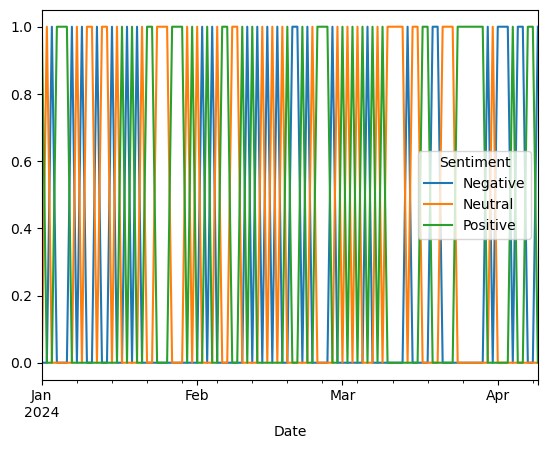

In [17]:
# Sentiment Trends Over Time
daily_sentiment = data_cleaned.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
daily_sentiment.plot(kind='line')
plt.show()


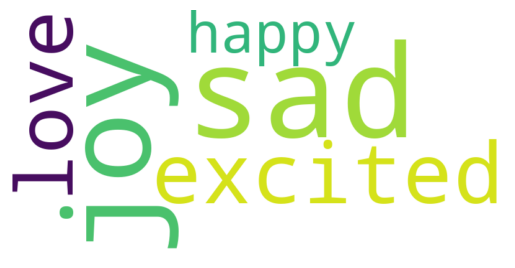

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

hashtags = ' '.join(data_cleaned['Hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
plt.show()


Accuracy: 0.23333333333333334


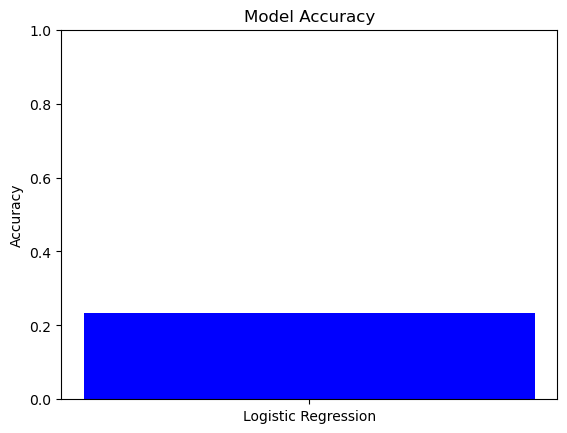

In [23]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Convert text data (Hashtags) to numerical features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_cleaned['Hashtags'])

# Sentiment labels
y = data_cleaned['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot accuracy in a bar chart
fig, ax = plt.subplots()
ax.bar(['Logistic Regression'], [accuracy], color='blue')
ax.set_ylim(0, 1)
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy')

plt.show()


In [25]:
# Streamlit code for final output
import streamlit as st

st.title("Sentiment Analysis Dashboard")

# Sentiment Distribution
st.subheader("Sentiment Distribution")
sentiment_counts = data_cleaned['Sentiment'].value_counts()
st.bar_chart(sentiment_counts)

# Sentiment Trends
st.subheader("Sentiment Trends Over Time")
daily_sentiment = data_cleaned.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
st.line_chart(daily_sentiment)

# Hashtags Word Cloud
st.subheader("Top Hashtags WordCloud")
hashtags = ' '.join(data_cleaned['Hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
fig, ax = plt.subplots()
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
st.pyplot(fig)


DeltaGenerator()

In [31]:
!pip install streamlit pandas numpy matplotlib scikit-learn


In [51]:
# Step 9: Classification Report - Visualization
st.subheader("Classification Report")
report = classification_report(y_test, y_pred, zero_division=0)
st.text(report)


DeltaGenerator()

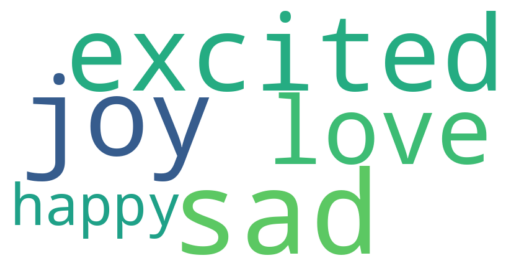

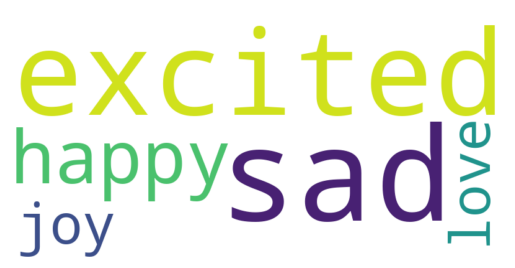

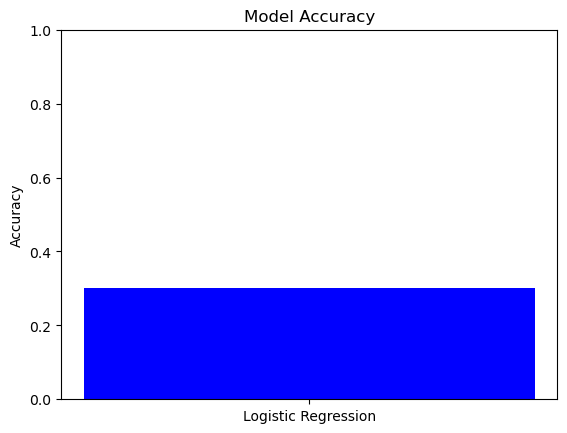

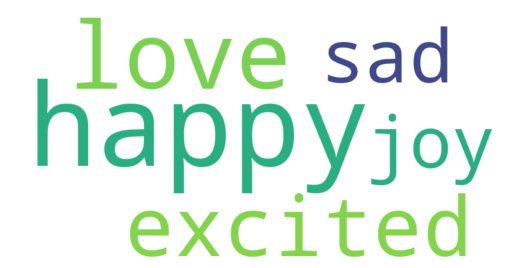

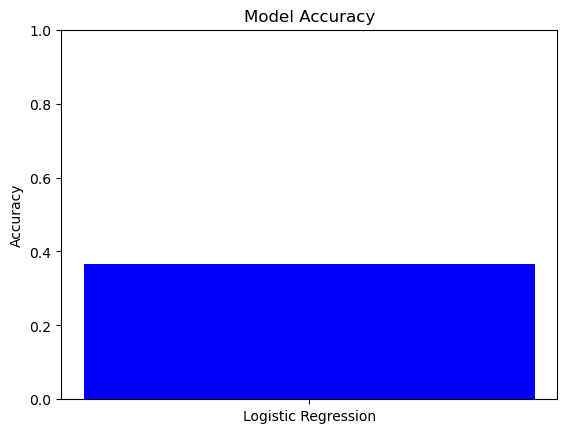

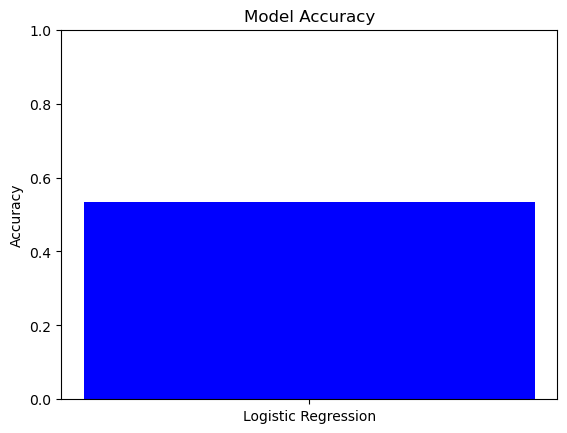

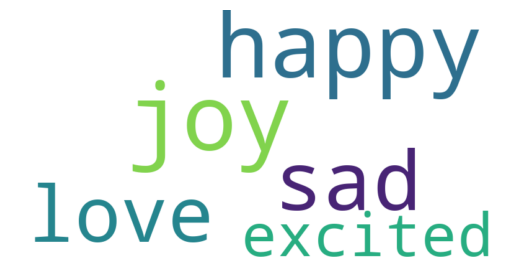

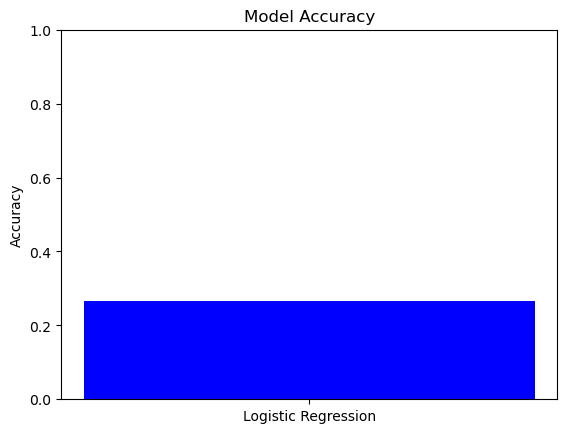

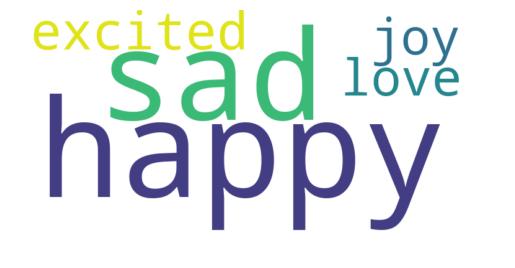

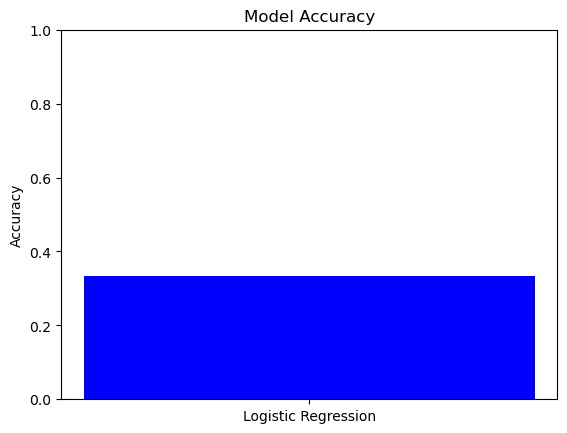

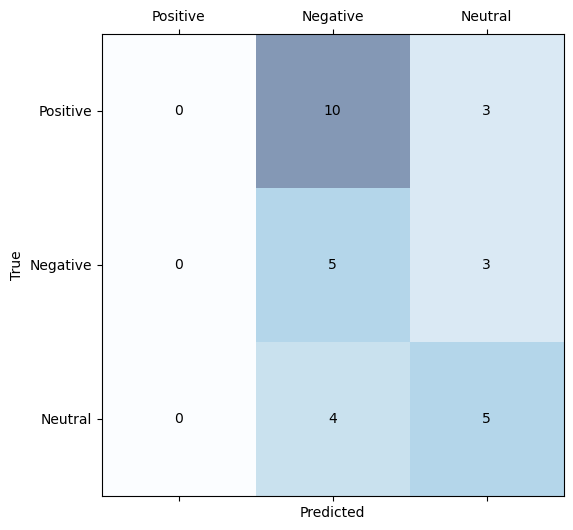

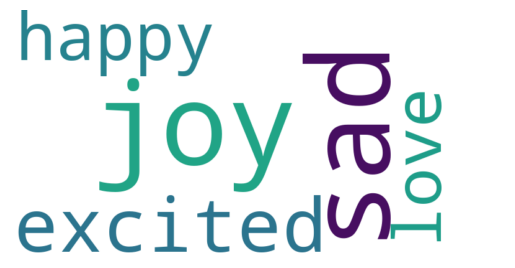

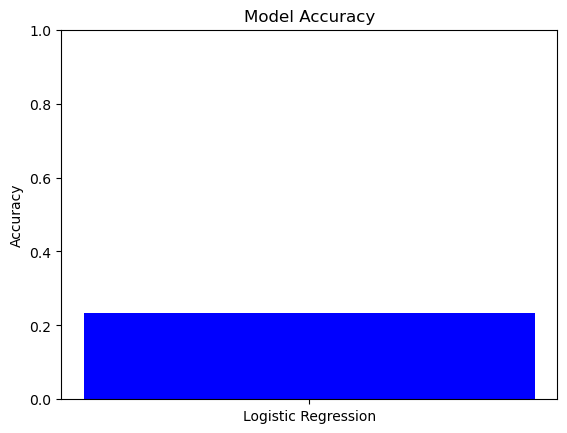

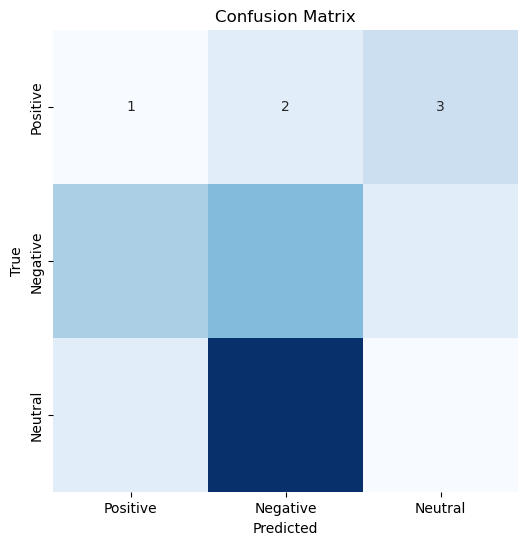

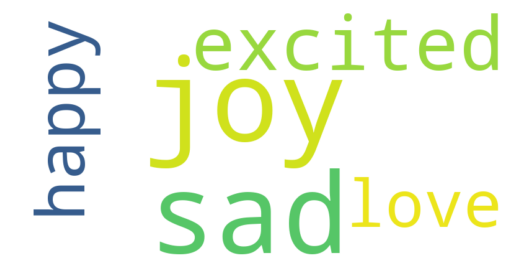

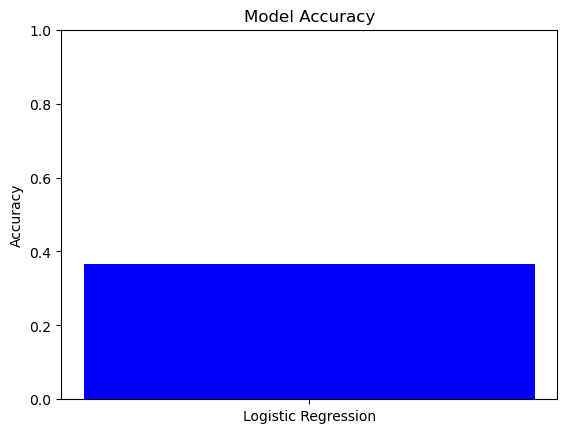

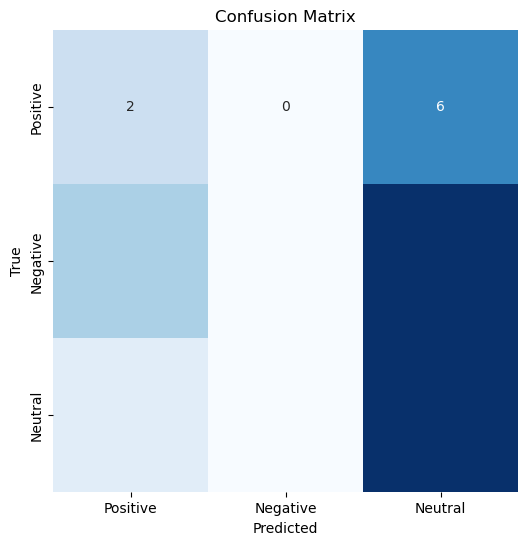

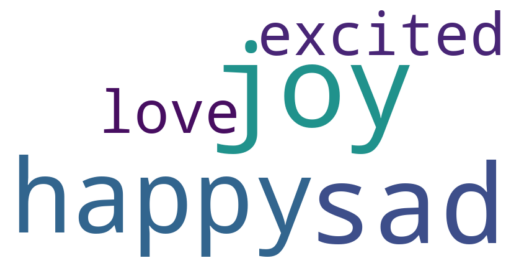

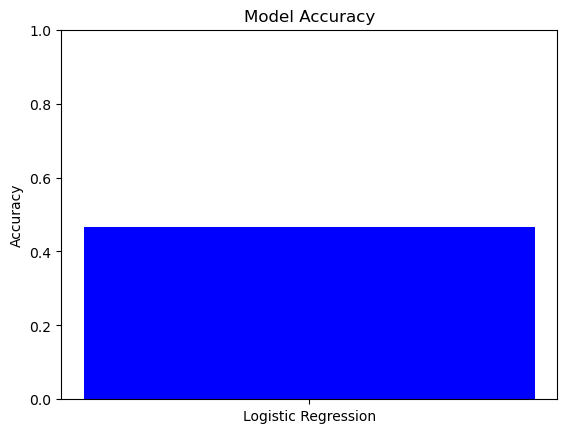

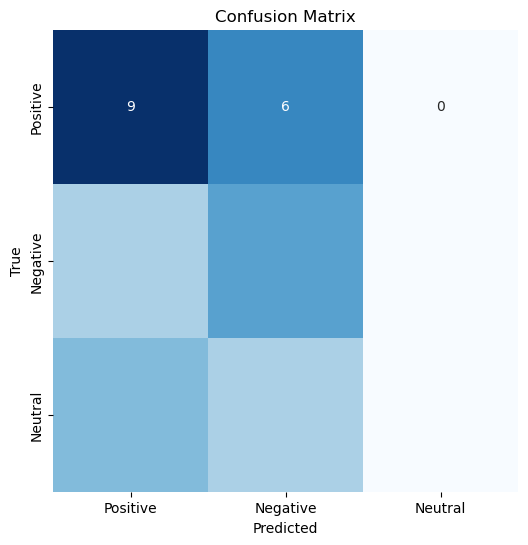

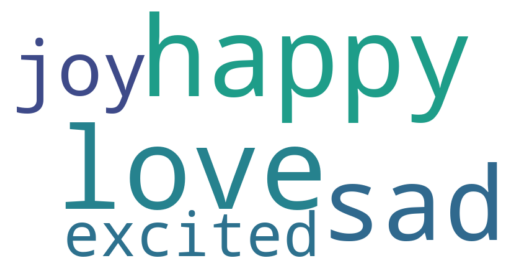

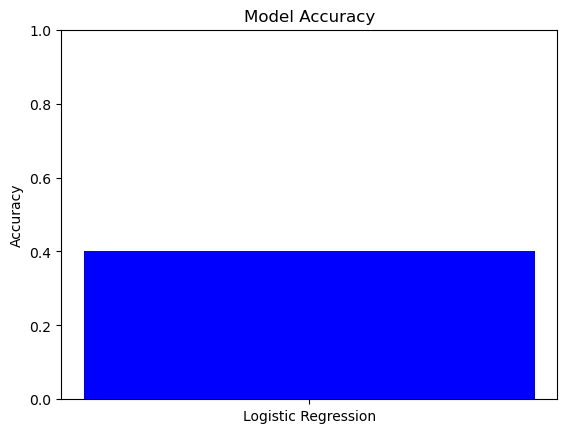

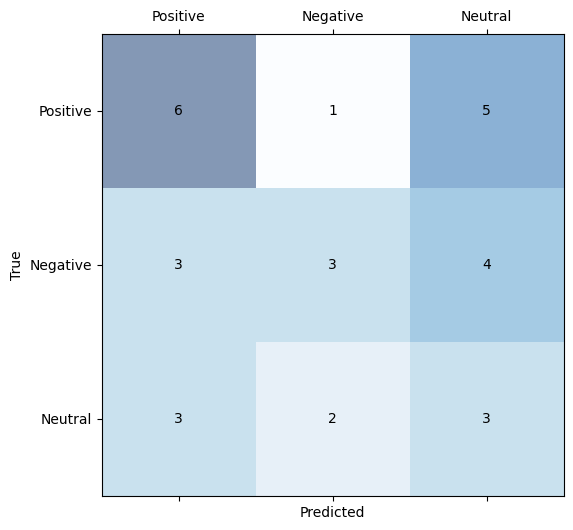

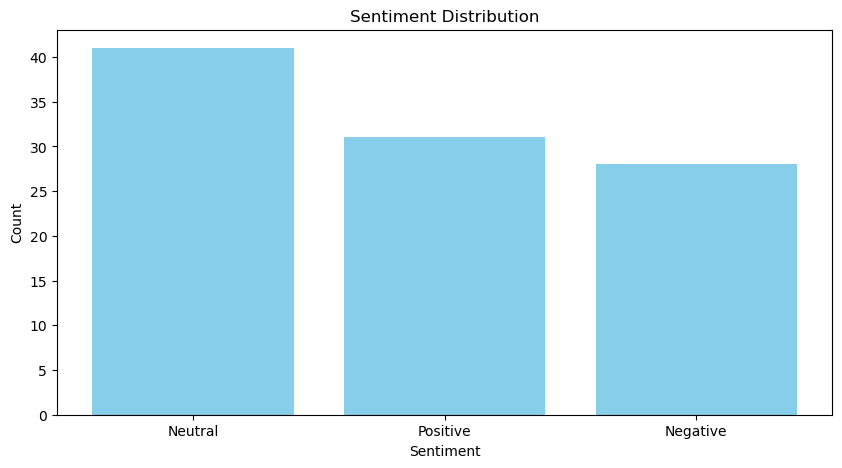

<Figure size 1000x500 with 0 Axes>

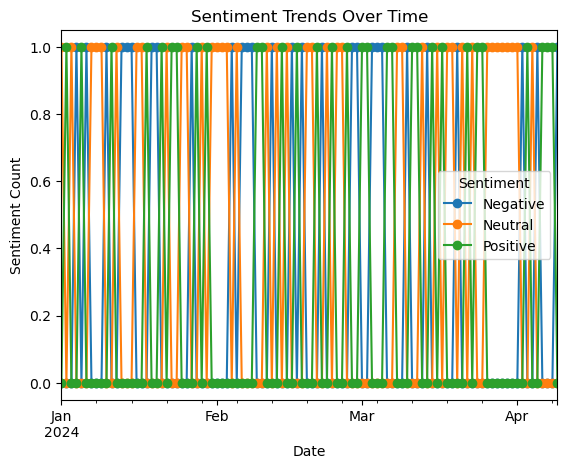

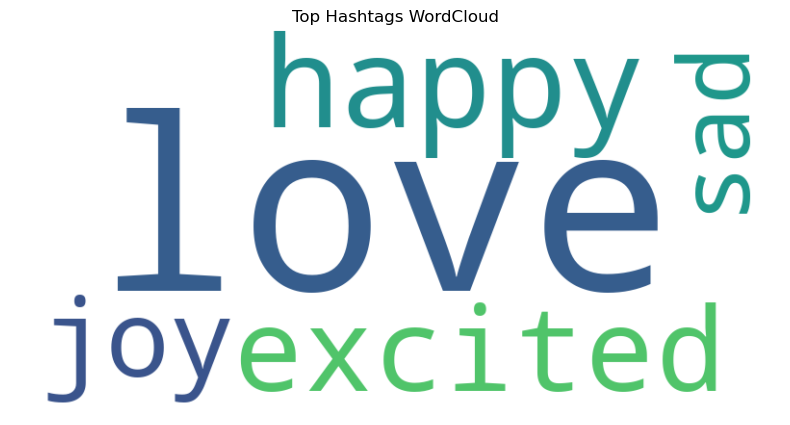

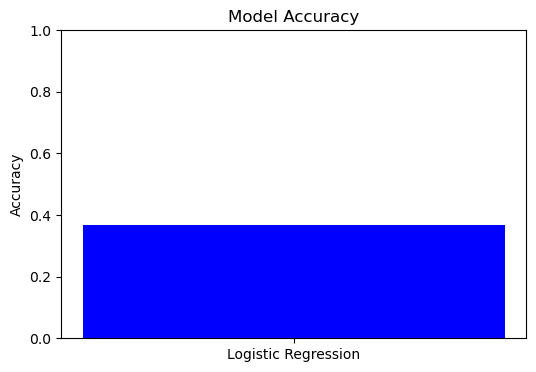

Classification Report:
              precision    recall  f1-score   support

    Negative       0.20      0.14      0.17         7
     Neutral       0.43      0.77      0.56        13
    Positive       0.00      0.00      0.00        10

    accuracy                           0.37        30
   macro avg       0.21      0.30      0.24        30
weighted avg       0.24      0.37      0.28        30



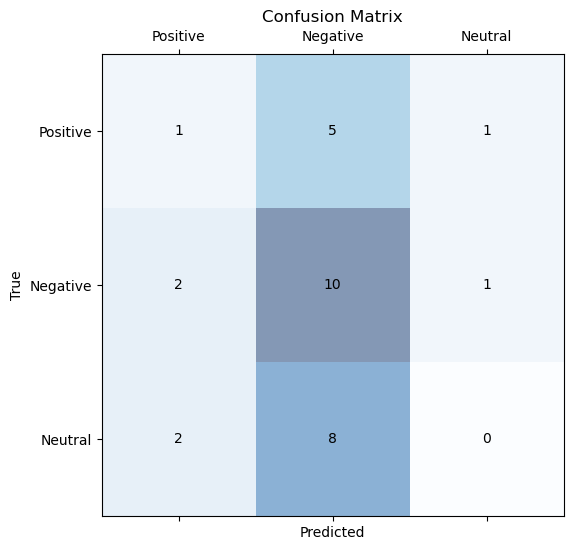

The logistic regression model's accuracy is 0.37


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Mock Data Creation (Replace with your actual data)
# Sample dataset - Replace this with your actual dataset
data = {
    'Date': pd.date_range(start='2024-01-01', periods=100, freq='D'),
    'Sentiment': np.random.choice(['Positive', 'Negative', 'Neutral'], 100),
    'Hashtags': np.random.choice(['#happy', '#sad', '#excited', '#joy', '#love'], 100)
}

# Step 2: Create DataFrame
data_cleaned = pd.DataFrame(data)

# Step 3: Data Preprocessing
# Handle missing values and data type conversion
data_cleaned.dropna(subset=['Sentiment', 'Date', 'Hashtags'], inplace=True)
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Hashtags'] = data_cleaned['Hashtags'].apply(lambda x: x.strip())

# Step 4: Sentiment Distribution - Visualization
plt.figure(figsize=(10, 5))
sentiment_counts = data_cleaned['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Step 5: Sentiment Trends - Visualization
plt.figure(figsize=(10, 5))
daily_sentiment = data_cleaned.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)
daily_sentiment.plot(kind='line', marker='o')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Count')
plt.legend(title="Sentiment")
plt.show()

# Step 6: Top Hashtags WordCloud - Visualization
plt.figure(figsize=(10, 5))
hashtags = ' '.join(data_cleaned['Hashtags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Hashtags WordCloud')
plt.show()

# Step 7: Model Training and Evaluation
# Convert text data (Hashtags) to numerical features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data_cleaned['Hashtags'])

# Sentiment labels
y = data_cleaned['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Display Accuracy with a Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(['Logistic Regression'], [accuracy], color='blue')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

# Step 9: Classification Report - Visualization
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Confusion Matrix - Visualization
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6,6))

# Display confusion matrix
ax.matshow(cm, cmap='Blues', alpha=0.5)

# Set tick positions and labels
ax.set_xticks(np.arange(len(['Positive', 'Negative', 'Neutral'])))
ax.set_yticks(np.arange(len(['Positive', 'Negative', 'Neutral'])))
ax.set_xticklabels(['Positive', 'Negative', 'Neutral'])
ax.set_yticklabels(['Positive', 'Negative', 'Neutral'])

# Annotate the confusion matrix with values
for (i, j), value in np.ndenumerate(cm):
    ax.text(j, i, value, ha='center', va='center', color='black')

ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Final output, showing key metrics in a concise manner
print(f"The logistic regression model's accuracy is {accuracy:.2f}")
